In [30]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Train test split
# 3. Scale the values
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

step-1 - Preprocess + EDA + Feature Selection

In [31]:
import pandas as pd

In [32]:
#pre-process - Feature Selection
# all csv files
data1 = pd.read_csv("placement-dataset-1.csv").dropna()
data2 = pd.read_csv("placement-dataset-2.csv").dropna()
data3 = pd.read_csv("placement-3.csv").dropna()

#placement-dataset-2 remove city filed
data2 = data2.iloc[:, 1:]

#add all data
data = pd.concat([data1, data2, data3])

#remove first col
data = data.iloc[:, 1:]

data


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [33]:
#EDA
import matplotlib.pyplot as plt

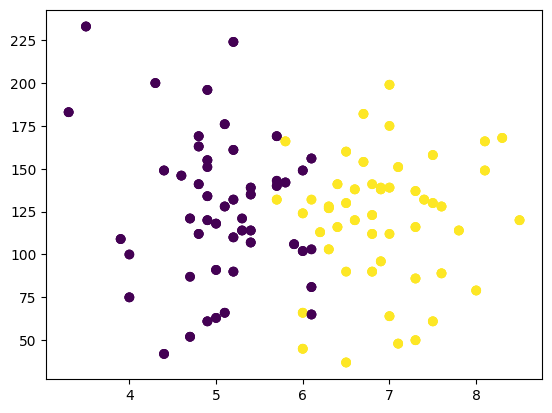

In [34]:
#draw graph and decide which algo is use
plt.scatter(x=data["cgpa"], y=data["iq"], c=data["placement"])
# linear is better option

step-2 Extract input and output cols

In [35]:
x = data.iloc[:,:2]
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cgpa    288 non-null    float64
 1   iq      288 non-null    float64
dtypes: float64(2)
memory usage: 6.8 KB


In [36]:
y = data.iloc[:,2]
y.info()

<class 'pandas.core.series.Series'>
Index: 288 entries, 0 to 99
Series name: placement
Non-Null Count  Dtype
--------------  -----
288 non-null    int64
dtypes: int64(1)
memory usage: 4.5 KB


step-3 Train test split

In [37]:
#for select testing data
from sklearn.model_selection import train_test_split

In [38]:
trainX, testX, trainY, testY = train_test_split(x,y,test_size=0.1) #0.1 means 10% data for testing

In [39]:
trainX

,cgpa,iq
33,6.0,149.0
13,6.4,116.0
50,3.5,233.0
57,6.5,130.0
16,5.2,224.0
...,...,...
12,5.4,139.0
29,7.0,112.0
52,7.0,175.0
1,5.9,106.0


In [40]:
trainY.shape

(259,)

In [41]:
testX.shape

(29, 2)

In [42]:
testY.shape

(29,)

step-3 Scale the values

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
trainX = scaler.fit_transform(trainX)
trainX

array([[-4.80059248e-02,  6.37107430e-01],
       [ 3.02234484e-01, -1.72972487e-01],
       [-2.23700848e+00,  2.69912904e+00],
       [ 3.89794587e-01,  1.70697781e-01],
       [-7.48486743e-01,  2.47819815e+00],
       [-5.73366538e-01, -3.93903374e-01],
       [ 8.27595098e-01, -1.44946205e+00],
       [ 5.64914791e-01,  1.44718735e+00],
       [-1.53652766e+00,  1.88904912e+00],
       [ 7.40034996e-01,  3.91628667e-01],
       [ 6.52474893e-01, -8.11217271e-01],
       [-5.73366538e-01,  3.91628667e-01],
       [ 3.89794587e-01, -2.11225471e+00],
       [ 1.09027540e+00, -9.09408776e-01],
       [-1.09872715e+00,  4.40724420e-01],
       [ 5.64914791e-01,  1.44718735e+00],
       [-1.09872715e+00,  4.40724420e-01],
       [ 3.89794587e-01,  1.70697781e-01],
       [-1.01116705e+00,  6.86203183e-01],
       [-4.80059248e-02, -1.91587170e+00],
       [ 7.40034996e-01, -6.63930013e-01],
       [ 6.52474893e-01, -8.11217271e-01],
       [ 1.35295571e+00, -8.35765147e-01],
       [ 3.

In [46]:
testX = scaler.transform(testX)
testX

array([[-1.18628725e+00, -8.84860900e-01],
       [-7.48486743e-01, -8.11217271e-01],
       [ 7.40034996e-01, -6.63930013e-01],
       [-1.01116705e+00,  1.79085762e+00],
       [ 6.52474893e-01, -1.13735334e-03],
       [-1.01116705e+00, -7.47809822e-02],
       [-1.79920797e+00, -1.17943542e+00],
       [-2.41212869e+00,  1.47173522e+00],
       [ 4.77354689e-01,  3.67080791e-01],
       [-2.23126129e-01,  1.05442133e+00],
       [ 3.89794587e-01,  9.07134069e-01],
       [-7.48486743e-01, -3.20259745e-01],
       [-4.80059248e-02, -1.91587170e+00],
       [-4.80059248e-02,  2.34105230e-02],
       [-9.23606948e-01, -1.23876735e-01],
       [-6.60926641e-01, -2.22068240e-01],
       [ 1.26539561e+00,  1.70697781e-01],
       [-4.80059248e-02, -5.16642755e-01],
       [-1.09872715e+00,  9.80777698e-01],
       [-1.88676807e+00, -3.44807621e-01],
       [ 2.14674382e-01, -4.92094879e-01],
       [ 1.09027540e+00, -1.72972487e-01],
       [-2.23126129e-01,  4.65272296e-01],
       [-1.

step-4 Train the model

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
#model train
lr.fit(trainX, trainY)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [50]:
#predict on test data
predictY = lr.predict(testX)
predictY

array([ 0.03169822,  0.21139595,  0.82255511,  0.09878102,  0.78538757,
        0.10216245, -0.21953156, -0.47610044,  0.7127877 ,  0.42381197,
        0.67584262,  0.2105061 ,  0.50112805,  0.49761314,  0.13821768,
        0.24629438,  1.03683981,  0.49859198,  0.06428303, -0.25701055,
        0.60644621,  0.96553023,  0.42487979,  0.06428303,  0.03018548,
        0.10060522, -0.1171944 ,  0.42487979,  0.10216245])

In [51]:
testY.shape

(29,)

step-5 Evaluate the model/model selection

In [52]:
#accuracy
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(testY, predictY)*100 , "%")

ROC-AUC: 97.89473684210527 %


step-6 export model

In [53]:
import pickle

In [54]:
pickle.dump(lr, open("placement-model.pkl", "wb"))